# McDonald's Nutrition: What you should have if you are on a specific diet

McDonald's is one of the worlds largest fast food resturants and according to Lock(2020) as of 2019, there were a total of 38,695 franchised restaurants globally. McDonald's food is globally regarded as rather unhealthy for you, but in this notebook, I want to show that even though you maybe on a diet, you can still enjoy McDonald's to its fullest. In this notebook I will be using a kaggle dataset called Nutrition Facts for McDonald's Menu by McDonalds, to try to change societal perceptions of fast food. 

This notebook will cover the following:

    * What is the unhealthiest food option on McDonald's menu?
    
    * What is the healthiest food option on the McDonald's menu?
    
    * What is the healthiest drinks option on the McDonald's menu?
    
    * What can you eat if you are on a low carb diet?
    
    * What can you eat if you are on a low fat diet?
    
    * What can you eat if you are on a low sodium diet?
    
    * What can you eat if you are on a high protein diet?
    
    * What can you eat if you are on a heart related diet?
    

# Data preparation

Before we start analysing the data and making assumptions, we need to load the data into the notebook.

In [1]:
# Allows for the use of linear algebra
import numpy as np

# Allows for the use of data processing 
import pandas as pd

# Allows for the use of graphs
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Reads the csv file and stores it as a dataFrame within a variable
menu_dataset = pd.read_csv('menu.csv')

# Displays the first 5 dataFrame rows
menu_dataset.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [3]:
# Shows if any of the columns have missing values
menu_dataset.isnull()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
256,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
257,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
258,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


From the output windows above, we can see that there are a total of 24 columns with no missing values.

In order to make data analysis slightly easier, I have separated each catagory into more sizable datasets using SQL techniques. The SQL script I used:

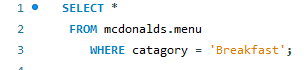

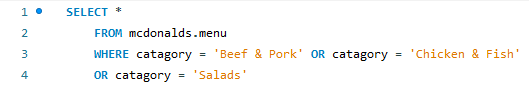

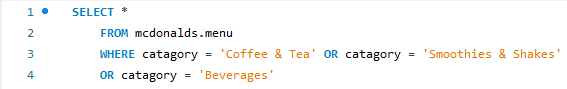

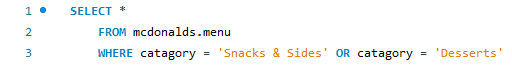

In [4]:
from IPython.display import Image
from IPython.display import display
breakfast = Image(filename='D:\\Jupyter Notebook\\DS projects\\mcdonalds-data-science\\McDonalds Nutritional facts\\SQL Images\\Breakfast.jpg')
mains = Image(filename='D:\\Jupyter Notebook\\DS projects\\mcdonalds-data-science\\McDonalds Nutritional facts\\SQL Images\\mains.jpg') 
drinks = Image(filename='D:\\Jupyter Notebook\\DS projects\\mcdonalds-data-science\\McDonalds Nutritional facts\\SQL Images\\Drinks.jpg') 
sides = Image(filename='D:\\Jupyter Notebook\\DS projects\\mcdonalds-data-science\\McDonalds Nutritional facts\\SQL Images\\Sides.jpg') 
display(breakfast, mains, drinks, sides)

In [5]:
breakfast_menu = pd.read_csv('breakfast.csv')

main_menu = pd.read_csv('mains_menu.csv')

beverage_menu = pd.read_csv('drinks_menu.csv')

extras_menu = pd.read_csv('extras_menu.csv')

# Data Analysis


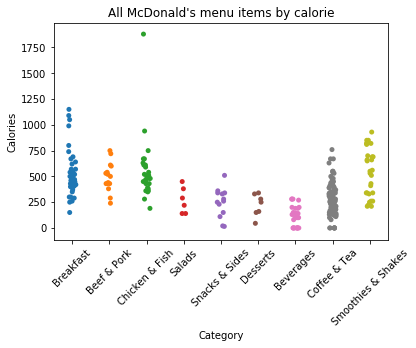

In [6]:
# Creates a strip plot graph that shows the highest number of calories in the catgory column
catagory_plot = sns.stripplot(x='Category', y='Calories', data=menu_dataset, size=5)
# assigns labels to the x axis and sets them to a 45 degree angle
catagory_plot.set_xticklabels(catagory_plot.get_xticklabels(), rotation= 45)
plt.title('All McDonald\'s menu items by calorie')
plt.show()

In [7]:
# Identifies the top 5 highest calorie menu items
menu_dataset.nlargest(5, 'Calories')

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
82,Chicken & Fish,Chicken McNuggets (40 piece),22.8 oz (646 g),1880,1060,118.0,182,20.0,101,1.0,...,118,39,6,24,1,87,0,15,8,25
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),15.3 oz (434 g),1150,540,60.0,93,20.0,100,0.0,...,116,39,7,28,17,36,15,2,30,40
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),14.8 oz (420 g),1090,510,56.0,87,19.0,96,0.0,...,111,37,6,23,17,36,15,2,25,40
34,Breakfast,Big Breakfast with Hotcakes and Egg Whites (La...,15.4 oz (437 g),1050,450,50.0,77,16.0,81,0.0,...,115,38,7,28,18,35,4,2,25,30
33,Breakfast,Big Breakfast with Hotcakes and Egg Whites (Re...,14.9 oz (423 g),990,410,46.0,70,16.0,78,0.0,...,110,37,6,23,17,35,0,2,25,30


From the data above, we can see that the top five unhealthiest menu items are:
    
    1. 40 piece Chicken Nuggets
    
    2. Big Breakfast with Hotcakes (Large Biscuit)
    
    3. Big Breakfast with Hotcakes (Regular Biscuit)
    
    4. Big Breakfast with Hotcakes and Egg Whites (Large Biscuit)
    
    5. Big Breakfast with Hotcakes and Egg Whites (Regular Biscuit)
    
This is quite a suprising result because I was not expecting so many breakfast menu items to be so high in calories compared to the lunch menu.

In [8]:
# Identifies the top 5 lowest calorie menu items
menu_dataset.nsmallest(5, 'Calories')

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
114,Beverages,Diet Coke (Small),16 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
115,Beverages,Diet Coke (Medium),21 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
116,Beverages,Diet Coke (Large),30 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
117,Beverages,Diet Coke (Child),12 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
122,Beverages,Diet Dr Pepper (Small),16 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,2,0,0,0,0


Now, I was expecting the lowest calorie menu items to be drinks because most diet drinks are zero calorie.

## Unhealthiest menu items by catagory

Within this section I will be identifying the most unhealthy breakfast item, main menu item, drinks menu item and side menu items.

### Unhealthy Breakfast Menu

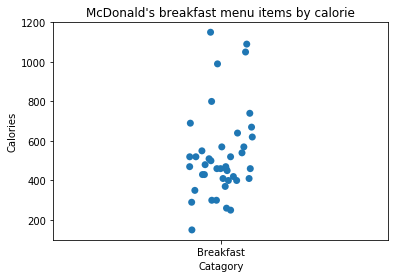

In [9]:
# Creates a strip plot graph that shows the highest number of calories in the catgory column
breakfast_plot = sns.stripplot(x='Catagory', y='Calories', data=breakfast_menu, size=7)
# assigns labels to the x axis and sets them to a 45 degree angle
breakfast_plot.set_xticklabels(breakfast_plot.get_xticklabels())
plt.title('McDonald\'s breakfast menu items by calorie')
plt.show()

In [10]:
# Identifies the top 5 highest calorie menu items
breakfast_menu.nlargest(5, 'Calories')

,Catagory,Item,Serving_Size,Calories,Calories_Fat,Total_Fat,Total_Daily_Fat,Saturated_Fat,Saturated_Daily_Fat,Trans_Fat,...,Carbohydrates,Carbohydrates_Daily,Dietary_Fibre,Dietary_Fibre_Daily,Sugars,Protein,Vitamin_A,Vitamin_C,Calcium_Daily,Iron_Daily
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),15.3 oz (434 g),1150,540,60,93,20,100,0,...,116,39,7,28,17,36,15,2,30,40
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),14.8 oz (420 g),1090,510,56,87,19,96,0,...,111,37,6,23,17,36,15,2,25,40
34,Breakfast,Big Breakfast with Hotcakes and Egg Whites (L,15.4 oz (437 g),1050,450,50,77,16,81,0,...,115,38,7,28,18,35,4,2,25,30
33,Breakfast,Big Breakfast with Hotcakes and Egg Whites (R,14.9 oz (423 g),990,410,46,70,16,78,0,...,110,37,6,23,17,35,0,2,25,30
28,Breakfast,Big Breakfast (Large Biscuit),10 oz (283 g),800,470,52,80,18,90,0,...,56,19,4,17,3,28,15,2,15,30


### Healthiest Breakfast menu items

In [11]:
# Identifies the top 5 lowest calorie menu items
breakfast_menu.nsmallest(5, 'Calories')

,Catagory,Item,Serving_Size,Calories,Calories_Fat,Total_Fat,Total_Daily_Fat,Saturated_Fat,Saturated_Daily_Fat,Trans_Fat,...,Carbohydrates,Carbohydrates_Daily,Dietary_Fibre,Dietary_Fibre_Daily,Sugars,Protein,Vitamin_A,Vitamin_C,Calcium_Daily,Iron_Daily
38,Breakfast,Hash Brown,2 oz (56 g),150,80,9,14,2,6,0,...,15,5,2,6,0,1,0,2,0,2
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8,12,3,15,0,...,30,10,4,17,3,18,6,0,25,8
41,Breakfast,Fruit & Maple Oatmeal without Brown Sugar,9.6 oz (251 g),260,40,4,6,2,8,0,...,49,16,5,22,18,5,2,130,6,10
40,Breakfast,Fruit & Maple Oatmeal,9.6 oz (251 g),290,35,4,6,2,8,0,...,58,19,5,19,32,5,2,130,10,10
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13,20,5,25,0,...,31,10,4,17,3,17,10,0,25,15


pass

### Unhealthiest main menu items

Now we will look at what main menu items you should probably avoid or should eat if you are looking to stay healthy.

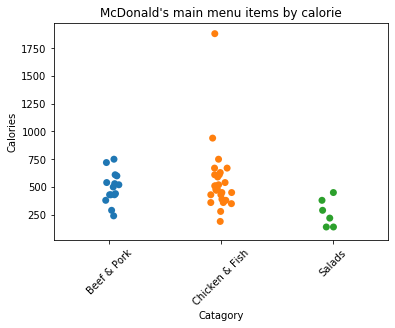

In [12]:
# Creates a strip plot graph that shows the highest number of calories in the main menu catagory column
main_plot = sns.stripplot(x='Catagory', y='Calories', data=main_menu, size=7)
# assigns labels to the x axis and sets them to a 45 degree angle
main_plot.set_xticklabels(main_plot.get_xticklabels(), rotation= 45)
plt.title('McDonald\'s main menu items by calorie')
plt.show()

In [13]:
# select rows that equal to beef & pork from the catagory column
beef_pork = main_menu.loc[main_menu['Catagory'] == 'Beef & Pork']

# outputs the top 5 rows with the highest calories
beef_pork.nlargest(5, 'Calories')

,Catagory,Item,Serving_Size,Calories,Calories_Fat,Total_Fat,Total_Daily_Fat,Saturated_Fat,Saturated_Daily_Fat,Trans_Fat,...,Carbohydrates,Carbohydrates_Daily,Dietary_Fibre,Dietary_Fibre_Daily,Sugars,Protein,Vitamin_A,Vitamin_C,Calcium_Daily,Iron_Daily
5,Beef & Pork,Double Quarter Pounder with Cheese,10 oz (283 g),750,380,43,66,19,96,3,...,42,14,3,11,10,48,10,2,30,35
9,Beef & Pork,Bacon Clubhouse Burger,9.5 oz (270 g),720,360,40,62,15,75,2,...,51,17,4,14,14,39,8,25,30,25
3,Beef & Pork,Quarter Pounder with Bacon Habanero Ranch,8.3 oz (235 g),610,280,31,48,13,64,2,...,46,15,3,14,10,37,8,20,25,30
2,Beef & Pork,Quarter Pounder with Bacon & Cheese,8 oz (227 g),600,260,29,45,13,63,2,...,48,16,3,12,12,37,6,15,25,30
4,Beef & Pork,Quarter Pounder Deluxe,8.6 oz (244 g),540,250,27,42,11,54,2,...,45,15,3,13,9,29,10,8,25,30


In [14]:
chicken_fish = main_menu.loc[main_menu['Catagory'] == 'Chicken & Fish']

chicken_fish.nlargest(5, 'Calories')

,Catagory,Item,Serving_Size,Calories,Calories_Fat,Total_Fat,Total_Daily_Fat,Saturated_Fat,Saturated_Daily_Fat,Trans_Fat,...,Carbohydrates,Carbohydrates_Daily,Dietary_Fibre,Dietary_Fibre_Daily,Sugars,Protein,Vitamin_A,Vitamin_C,Calcium_Daily,Iron_Daily
40,Chicken & Fish,Chicken McNuggets (40 piece),22.8 oz (646 g),1880,1060,118,182,20,101,1,...,118,39,6,24,1,87,0,15,8,25
39,Chicken & Fish,Chicken McNuggets (20 piece),11.4 oz (323 g),940,530,59,91,10,50,0,...,59,20,3,12,0,44,0,8,4,10
21,Chicken & Fish,Bacon Clubhouse Crispy Chicken Sandwich,10 oz (284 g),750,340,38,59,10,51,1,...,65,22,4,15,16,36,8,25,30,15
17,Chicken & Fish,Premium Crispy Chicken Club Sandwich,8.8 oz (249 g),670,300,33,51,9,44,0,...,58,19,3,14,11,36,8,20,30,20
32,Chicken & Fish,Premium McWrap Southwest Chicken (Crispy Chic,11.1 oz (314 g),670,300,33,51,8,40,1,...,68,23,5,19,12,27,60,15,20,20


In [15]:
salads = main_menu.loc[main_menu['Catagory'] == 'Salads']

salads.nlargest(5, 'Calories')

,Catagory,Item,Serving_Size,Calories,Calories_Fat,Total_Fat,Total_Daily_Fat,Saturated_Fat,Saturated_Daily_Fat,Trans_Fat,...,Carbohydrates,Carbohydrates_Daily,Dietary_Fibre,Dietary_Fibre_Daily,Sugars,Protein,Vitamin_A,Vitamin_C,Calcium_Daily,Iron_Daily
46,Salads,Premium Southwest Salad with Crispy Chicken,12.3 oz (348 g),450,190,22,33,5,22,0,...,42,14,7,28,12,23,170,30,15,15
43,Salads,Premium Bacon Ranch Salad with Crispy Chicken,9 oz (255 g),380,190,21,33,6,29,0,...,22,7,2,10,5,25,100,25,15,8
47,Salads,Premium Southwest Salad with Grilled Chicken,11.8 oz (335 g),290,80,8,13,3,13,0,...,28,9,7,28,10,27,170,30,15,15
44,Salads,Premium Bacon Ranch Salad with Grilled Chicke,8.5 oz (241 g),220,80,8,13,4,20,0,...,8,3,2,10,4,29,110,30,15,8
42,Salads,Premium Bacon Ranch Salad (without Chicken),7.9 oz (223 g),140,70,7,11,4,18,0,...,10,3,3,12,4,9,170,30,15,6


### Healthiest Main Menu items

In [16]:
# select rows that equal to beef & pork from the catagory column
beef_pork = main_menu.loc[main_menu['Catagory'] == 'Beef & Pork']

# outputs the top 5 rows with the lowest calories
beef_pork.nsmallest(5, 'Calories')

,Catagory,Item,Serving_Size,Calories,Calories_Fat,Total_Fat,Total_Daily_Fat,Saturated_Fat,Saturated_Daily_Fat,Trans_Fat,...,Carbohydrates,Carbohydrates_Daily,Dietary_Fibre,Dietary_Fibre_Daily,Sugars,Protein,Vitamin_A,Vitamin_C,Calcium_Daily,Iron_Daily
6,Beef & Pork,Hamburger,3.5 oz (98 g),240,70,8,12,3,15,0,...,32,11,1,6,6,12,2,2,10,15
7,Beef & Pork,Cheeseburger,4 oz (113 g),290,100,11,18,5,27,1,...,33,11,2,7,7,15,6,2,20,15
10,Beef & Pork,McDouble,5.2 oz (147 g),380,150,17,26,8,40,1,...,34,11,2,7,7,22,6,2,20,20
8,Beef & Pork,Double Cheeseburger,5.7 oz (161 g),430,190,21,32,10,52,1,...,35,12,2,8,7,24,10,2,30,20
12,Beef & Pork,Daily Double,6.7 oz (190 g),430,200,22,35,9,44,1,...,34,11,2,8,7,22,8,8,20,20


In [17]:
chicken_fish = main_menu.loc[main_menu['Catagory'] == 'Chicken & Fish']

chicken_fish.nsmallest(5, 'Calories')

,Catagory,Item,Serving_Size,Calories,Calories_Fat,Total_Fat,Total_Daily_Fat,Saturated_Fat,Saturated_Daily_Fat,Trans_Fat,...,Carbohydrates,Carbohydrates_Daily,Dietary_Fibre,Dietary_Fibre_Daily,Sugars,Protein,Vitamin_A,Vitamin_C,Calcium_Daily,Iron_Daily
36,Chicken & Fish,Chicken McNuggets (4 piece),2.3 oz (65 g),190,110,12,18,2,10,0,...,12,4,1,2,0,9,0,2,0,2
37,Chicken & Fish,Chicken McNuggets (6 piece),3.4 oz (97 g),280,160,18,27,3,15,0,...,18,6,1,4,0,13,0,2,2,4
16,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,7 oz (200 g),350,80,9,13,2,9,0,...,42,14,3,13,8,28,4,8,15,20
24,Chicken & Fish,McChicken,5.1 oz (143 g),360,140,16,25,3,15,0,...,40,13,2,7,5,14,0,2,10,15
27,Chicken & Fish,Buffalo Ranch McChicken,5.2 oz (148 g),360,150,16,25,3,16,0,...,40,13,2,7,5,14,2,2,15,15


In [18]:
salads = main_menu.loc[main_menu['Catagory'] == 'Salads']

salads.nsmallest(5, 'Calories')

,Catagory,Item,Serving_Size,Calories,Calories_Fat,Total_Fat,Total_Daily_Fat,Saturated_Fat,Saturated_Daily_Fat,Trans_Fat,...,Carbohydrates,Carbohydrates_Daily,Dietary_Fibre,Dietary_Fibre_Daily,Sugars,Protein,Vitamin_A,Vitamin_C,Calcium_Daily,Iron_Daily
42,Salads,Premium Bacon Ranch Salad (without Chicken),7.9 oz (223 g),140,70,7,11,4,18,0,...,10,3,3,12,4,9,170,30,15,6
45,Salads,Premium Southwest Salad (without Chicken),8.1 oz (230 g),140,40,5,7,2,9,0,...,20,7,6,23,6,6,160,25,15,10
44,Salads,Premium Bacon Ranch Salad with Grilled Chicke,8.5 oz (241 g),220,80,8,13,4,20,0,...,8,3,2,10,4,29,110,30,15,8
47,Salads,Premium Southwest Salad with Grilled Chicken,11.8 oz (335 g),290,80,8,13,3,13,0,...,28,9,7,28,10,27,170,30,15,15
43,Salads,Premium Bacon Ranch Salad with Crispy Chicken,9 oz (255 g),380,190,21,33,6,29,0,...,22,7,2,10,5,25,100,25,15,8


### Healthy and unhealthy Beverage menu items

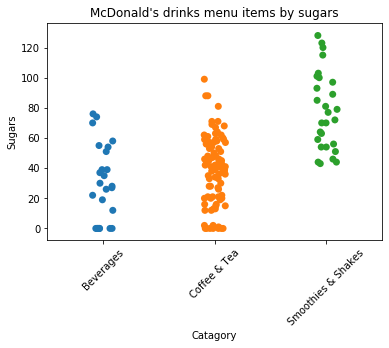

In [19]:
# Creates a strip plot graph that shows the highest sugary drink in the catagory column
drinks_plot = sns.stripplot(x='Catagory', y='Sugars', data=beverage_menu, size=7)
# assigns labels to the x axis and sets them to a 45 degree angle
drinks_plot.set_xticklabels(drinks_plot.get_xticklabels(), rotation= 45)
plt.title('McDonald\'s drinks menu items by sugars')
plt.show()

### Unhealthy Beverage menu items

In [20]:
beverages = beverage_menu.loc[beverage_menu['Catagory'] == 'Beverages']

beverages.nlargest(5, 'Sugars')

,Catagory,Item,Serving_Size,Calories,Calories_Fat,Total_Fat,Total_Daily_Fat,Saturated_Fat,Saturated_Daily_Fat,Trans_Fat,...,Carbohydrates,Carbohydrates_Daily,Dietary_Fibre,Dietary_Fibre_Daily,Sugars,Protein,Vitamin_A,Vitamin_C,Calcium_Daily,Iron_Daily
2,Beverages,Coca-Cola Classic (Large),30 fl oz cup,280,0,0,0,0,0,0,...,76,25,0,0,76,0,0,0,0,0
18,Beverages,Sprite (Large),30 fl oz cup,280,0,0,0,0,0,0,...,74,25,0,0,74,0,0,0,0,0
10,Beverages,Dr Pepper (Large),30 fl oz cup,270,0,0,0,0,0,0,...,72,24,0,0,70,0,0,0,0,0
25,Beverages,Minute Maid Orange Juice (Large),22 fl oz cup,280,0,0,0,0,0,0,...,65,22,0,0,58,4,0,240,4,0
1,Beverages,Coca-Cola Classic (Medium),21 fl oz cup,200,0,0,0,0,0,0,...,55,18,0,0,55,0,0,0,0,0


In [21]:
tea_coffee = beverage_menu.loc[beverage_menu['Catagory'] == 'Coffee & Tea']

tea_coffee.nlargest(5, 'Sugars') 

,Catagory,Item,Serving_Size,Calories,Calories_Fat,Total_Fat,Total_Daily_Fat,Saturated_Fat,Saturated_Daily_Fat,Trans_Fat,...,Carbohydrates,Carbohydrates_Daily,Dietary_Fibre,Dietary_Fibre_Daily,Sugars,Protein,Vitamin_A,Vitamin_C,Calcium_Daily,Iron_Daily
121,Coffee & Tea,Frappé Chocolate Chip (Large),22 fl oz cup,760,280,31,48,20,101,2,...,111,37,1,5,99,12,20,0,35,6
115,Coffee & Tea,Frappé Mocha (Large),22 fl oz cup,670,240,26,41,17,85,1,...,98,33,1,4,88,11,20,0,35,4
118,Coffee & Tea,Frappé Caramel (Large),22 fl oz cup,670,250,27,42,17,87,2,...,96,32,0,0,88,11,20,0,35,2
120,Coffee & Tea,Frappé Chocolate Chip (Medium),16 fl oz cup,630,240,26,41,17,85,1,...,91,30,1,5,81,9,15,0,30,4
114,Coffee & Tea,Frappé Mocha (Medium),16 fl oz cup,550,200,22,34,14,71,1,...,80,27,1,4,71,9,15,0,25,4


In [22]:
shakes_smoothies = beverage_menu.loc[beverage_menu['Catagory'] == 'Smoothies & Shakes']

shakes_smoothies.nlargest(5, 'Sugars') 

,Catagory,Item,Serving_Size,Calories,Calories_Fat,Total_Fat,Total_Daily_Fat,Saturated_Fat,Saturated_Daily_Fat,Trans_Fat,...,Carbohydrates,Carbohydrates_Daily,Dietary_Fibre,Dietary_Fibre_Daily,Sugars,Protein,Vitamin_A,Vitamin_C,Calcium_Daily,Iron_Daily
143,Smoothies & Shakes,McFlurry with M&M’s Candies (Medium),16.2 oz (460 g),930,290,33,50,20,102,1,...,139,46,2,7,128,20,25,0,70,10
136,Smoothies & Shakes,Strawberry Shake (Large),22 fl oz cup,850,210,24,36,15,75,1,...,140,47,0,0,123,18,30,0,70,0
139,Smoothies & Shakes,Chocolate Shake (Large),22 fl oz cup,850,210,23,36,15,74,1,...,141,47,2,8,120,19,30,0,60,15
141,Smoothies & Shakes,Shamrock Shake (Large),22 fl oz cup,820,210,23,35,15,73,1,...,135,45,0,0,115,18,30,0,60,0
148,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Med,14.2 oz (403 g),810,290,32,50,15,76,1,...,114,38,2,9,103,21,20,0,60,6


### Healthiest Beverage Menu Items

In [23]:
beverages.nsmallest(5, 'Sugars')

,Catagory,Item,Serving_Size,Calories,Calories_Fat,Total_Fat,Total_Daily_Fat,Saturated_Fat,Saturated_Daily_Fat,Trans_Fat,...,Carbohydrates,Carbohydrates_Daily,Dietary_Fibre,Dietary_Fibre_Daily,Sugars,Protein,Vitamin_A,Vitamin_C,Calcium_Daily,Iron_Daily
4,Beverages,Diet Coke (Small),16 fl oz cup,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Beverages,Diet Coke (Medium),21 fl oz cup,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Beverages,Diet Coke (Large),30 fl oz cup,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Beverages,Diet Coke (Child),12 fl oz cup,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,Beverages,Diet Dr Pepper (Small),16 fl oz cup,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0


In [24]:
tea_coffee.nsmallest(5, 'Sugars') 

,Catagory,Item,Serving_Size,Calories,Calories_Fat,Total_Fat,Total_Daily_Fat,Saturated_Fat,Saturated_Daily_Fat,Trans_Fat,...,Carbohydrates,Carbohydrates_Daily,Dietary_Fibre,Dietary_Fibre_Daily,Sugars,Protein,Vitamin_A,Vitamin_C,Calcium_Daily,Iron_Daily
27,Coffee & Tea,Iced Tea (Small),16 fl oz cup,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,Coffee & Tea,Iced Tea (Medium),21 fl oz cup,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,Coffee & Tea,Iced Tea (Large),30 fl oz cup,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,Coffee & Tea,Iced Tea (Child),12 fl oz cup,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,Coffee & Tea,Coffee (Small),12 fl oz cup,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
shakes_smoothies.nsmallest(5, 'Sugars')

,Catagory,Item,Serving_Size,Calories,Calories_Fat,Total_Fat,Total_Daily_Fat,Saturated_Fat,Saturated_Daily_Fat,Trans_Fat,...,Carbohydrates,Carbohydrates_Daily,Dietary_Fibre,Dietary_Fibre_Daily,Sugars,Protein,Vitamin_A,Vitamin_C,Calcium_Daily,Iron_Daily
147,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11,17,6,29,0,...,53,18,1,2,43,8,10,0,25,6
122,Smoothies & Shakes,Blueberry Pomegranate Smoothie (Small),12 fl oz cup,220,5,1,1,0,0,0,...,50,17,3,12,44,2,0,2,6,2
125,Smoothies & Shakes,Strawberry Banana Smoothie (Small),12 fl oz cup,210,5,1,1,0,0,0,...,47,16,3,10,44,3,0,30,8,2
128,Smoothies & Shakes,Mango Pineapple Smoothie (Small),12 fl oz cup,210,5,1,1,0,0,0,...,50,17,1,4,46,2,30,20,8,2
149,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Sna,7.1 oz (202 g),410,150,16,25,8,38,0,...,57,19,1,5,51,10,10,0,30,4


### Unhealthiest side menu items

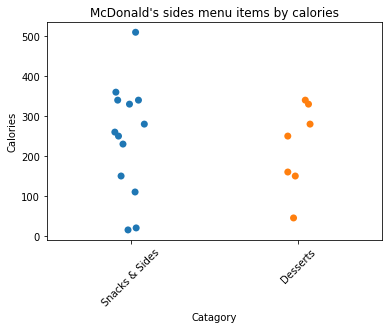

In [26]:
# Creates a strip plot graph that shows the highest sugary drink in the catagory column
sides_plot = sns.stripplot(x='Catagory', y='Calories', data=extras_menu, size=7)
# assigns labels to the x axis and sets them to a 45 degree angle
sides_plot.set_xticklabels(sides_plot.get_xticklabels(), rotation= 45)
plt.title('McDonald\'s sides menu items by calories')
plt.show()

In [27]:
snacks_sides = extras_menu.loc[extras_menu['Catagory'] == 'Snacks & Sides']

snacks_sides.nlargest(5, 'Calories')

,Catagory,Item,Serving_Size,Calories,Calories_Fat,Total_Fat,Total_Daily_Fat,Saturated_Fat,Saturated_Daily_Fat,Trans_Fat,...,Carbohydrates,Carbohydrates_Daily,Dietary_Fibre,Dietary_Fibre_Daily,Sugars,Protein,Vitamin_A,Vitamin_C,Calcium_Daily,Iron_Daily
8,Snacks & Sides,Large French Fries,5.9 oz (168 g),510,220,24,37,4,17,0,...,67,22,5,22,0,6,0,70,2,8
4,Snacks & Sides,Ranch Snack Wrap (Crispy Chicken),4.5 oz (128 g),360,180,20,30,5,27,0,...,32,11,1,5,3,15,2,0,10,10
0,Snacks & Sides,Chipotle BBQ Snack Wrap (Crispy Chicken),4.6 oz (130 g),340,130,15,23,5,22,0,...,37,12,1,6,8,14,4,0,10,10
7,Snacks & Sides,Medium French Fries,3.9 oz (111 g),340,140,16,24,3,11,0,...,44,15,4,14,0,4,0,45,2,4
2,Snacks & Sides,Honey Mustard Snack Wrap (Crispy Chicken),4.3 oz (123 g),330,130,15,23,5,22,0,...,34,11,1,5,3,14,2,0,10,10


In [28]:
desserts = extras_menu.loc[extras_menu['Catagory'] == 'Desserts']

desserts.nlargest(5, 'Calories')

,Catagory,Item,Serving_Size,Calories,Calories_Fat,Total_Fat,Total_Daily_Fat,Saturated_Fat,Saturated_Daily_Fat,Trans_Fat,...,Carbohydrates,Carbohydrates_Daily,Dietary_Fibre,Dietary_Fibre_Daily,Sugars,Protein,Vitamin_A,Vitamin_C,Calcium_Daily,Iron_Daily
18,Desserts,Hot Caramel Sundae,6.4 oz (182 g),340,70,8,12,5,24,0,...,60,20,0,0,43,7,10,0,25,0
17,Desserts,Hot Fudge Sundae,6.3 oz (179 g),330,80,9,14,7,34,0,...,53,18,1,3,48,8,8,0,25,8
19,Desserts,Strawberry Sundae,6.3 oz (178 g),280,60,6,10,4,20,0,...,49,16,0,0,45,6,8,4,20,0
13,Desserts,Baked Apple Pie,2.7 oz (77 g),250,110,13,19,7,35,0,...,32,11,4,15,13,2,4,25,2,6
14,Desserts,Chocolate Chip Cookie,1 cookie (33 g),160,70,8,12,4,19,0,...,21,7,1,3,15,2,2,0,2,8


### Healthiest side menu items

In [29]:
snacks_sides.nsmallest(5, 'Calories')

,Catagory,Item,Serving_Size,Calories,Calories_Fat,Total_Fat,Total_Daily_Fat,Saturated_Fat,Saturated_Daily_Fat,Trans_Fat,...,Carbohydrates,Carbohydrates_Daily,Dietary_Fibre,Dietary_Fibre_Daily,Sugars,Protein,Vitamin_A,Vitamin_C,Calcium_Daily,Iron_Daily
11,Snacks & Sides,Apple Slices,1.2 oz (34 g),15,0,0,0,0,0,0,...,4,1,0,0,3,0,0,160,2,0
10,Snacks & Sides,Side Salad,3.1 oz (87 g),20,0,0,0,0,0,0,...,4,1,1,6,2,1,45,25,2,4
9,Snacks & Sides,Kids French Fries,1.3 oz (38 g),110,50,5,8,1,4,0,...,15,5,1,5,0,1,0,15,0,2
12,Snacks & Sides,Fruit 'n Yogurt Parfait,5.2 oz (149 g),150,20,2,3,1,5,0,...,30,10,1,3,23,4,2,15,10,4
6,Snacks & Sides,Small French Fries,2.6 oz (75 g),230,100,11,17,2,8,0,...,30,10,2,10,0,2,0,30,0,4


In [30]:
desserts.nsmallest(5, 'Calories')

,Catagory,Item,Serving_Size,Calories,Calories_Fat,Total_Fat,Total_Daily_Fat,Saturated_Fat,Saturated_Daily_Fat,Trans_Fat,...,Carbohydrates,Carbohydrates_Daily,Dietary_Fibre,Dietary_Fibre_Daily,Sugars,Protein,Vitamin_A,Vitamin_C,Calcium_Daily,Iron_Daily
16,Desserts,Kids Ice Cream Cone,1 oz (29 g),45,10,2,2,1,4,0,...,7,2,0,0,6,1,2,0,4,0
15,Desserts,Oatmeal Raisin Cookie,1 cookie (33 g),150,50,6,9,3,13,0,...,22,7,1,3,13,2,2,0,2,6
14,Desserts,Chocolate Chip Cookie,1 cookie (33 g),160,70,8,12,4,19,0,...,21,7,1,3,15,2,2,0,2,8
13,Desserts,Baked Apple Pie,2.7 oz (77 g),250,110,13,19,7,35,0,...,32,11,4,15,13,2,4,25,2,6
19,Desserts,Strawberry Sundae,6.3 oz (178 g),280,60,6,10,4,20,0,...,49,16,0,0,45,6,8,4,20,0


## What can you eat at McDonald's on a diet?

Based on the results above you may be thinking "What can I eat on specific diet at McDonald's?", Well that question cannot be solved using data alone because of external factors that are unique to each customer. However, with data we can generalise each diet enableing us to identify some great options. 

From just this data alone, we cannot accurately suggest options for customers on plant-based(1), paleo(2) or similar diets due to the simple fact that we do not know what ingredients are in each product. We could make assuptions based on product names but as stated earlier, the data does not show possible ingredients. For instance, we can assume that the McChicken is a high protein product, yet, we can also assume that it also contains traces of wheat.

(1) Plant based diets according to the Association of UK Dietitians (N/A), " are based on foods derived from plants, including vegetables, wholegrains, legumes, nuts, seeds and fruits, with few or no animal products ".

(2) A paleo diet according to dictionary.com (N/A), is " a diet based on foods which adherents presume were available to Paleolithic humans. This often includes low grain consumption and high intake of protein and vegetables ".

So, we are going to start off with what you could eat on a low carbohydrate diet.

### Low Carbohydrate Diet

There are quite a few different types of low carb diet, but according to Diabetes UK (N/A), they all have one thing in common, the fact that to reduce the total amount of carbohydrate you eat in a day, you must limit your carb intake to less than 130g a day. However, during the day you should <ins>increase the amount of protein and fat you intake</ins> (But not by much), according to Bjarnadottir (2019). 

From this we can gain a sufficent amount of data, that we can use to make somewhat accurate suggestions.

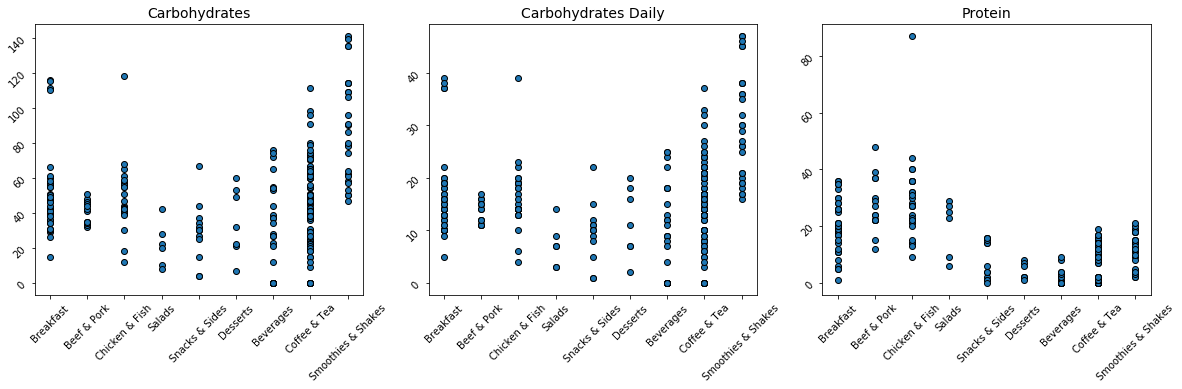

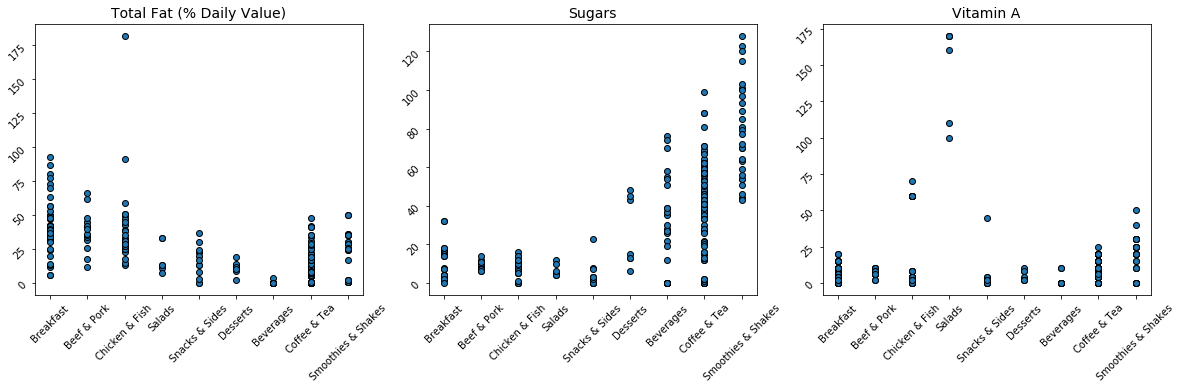

In [31]:
# Uses matplotlib's subplot function to create grouped scatter plots
# subplots parameters state that there will be a row of 3 plots with a size of 20 by 5
fig, ax = plt.subplots(1,3, figsize=(20,5))
# figsize=(12,5)
ax[0].scatter(menu_dataset['Category'], menu_dataset['Carbohydrates'], edgecolor='black')
ax[0].set_title('Carbohydrates', fontsize=14)
# sets the labels of the x axis to a 45 degree angle
ax[0].tick_params(labelrotation=45)

ax[1].scatter(menu_dataset['Category'], menu_dataset['Carbohydrates (% Daily Value)'],
               edgecolor='black')
ax[1].set_title('Carbohydrates Daily', fontsize=14)
ax[1].tick_params(labelrotation=45)

ax[2].scatter(menu_dataset['Category'], menu_dataset['Protein'], edgecolor='black')
ax[2].set_title('Protein', fontsize=14)
ax[2].tick_params(labelrotation=45)


fig1, ax1 = plt.subplots(1,3, figsize=(20,5))

ax1[0].scatter(menu_dataset['Category'], menu_dataset['Total Fat (% Daily Value)'], edgecolor='black')
ax1[0].set_title('Total Fat (% Daily Value)', fontsize=14)
ax1[0].tick_params(labelrotation=45)

ax1[1].scatter(menu_dataset['Category'], menu_dataset['Sugars'],
               edgecolor='black')
ax1[1].set_title('Sugars', fontsize=14)
ax1[1].tick_params(labelrotation=45)

ax1[2].scatter(menu_dataset['Category'], menu_dataset['Vitamin A (% Daily Value)'], 
               edgecolor='black')
ax1[2].set_title('Vitamin A', fontsize=14)
ax1[2].tick_params(labelrotation=45)

From these plots, we can see